<a href="https://colab.research.google.com/github/chunter3/Data_Analytics_Projects/blob/master/Binary_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Problem 1 (Start)

In [ ]:
# importing relevant libraries and initializing the data (x,y) for the tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

x = load_iris().data
y = load_iris().target

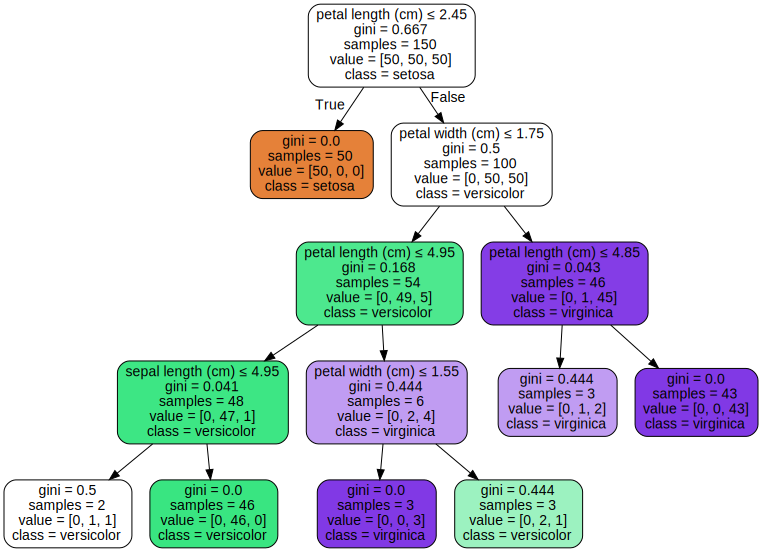

In [ ]:
# Creating the binary decision tree for the iris dataset based on restrictions given in problem

import graphviz  # Adds aesthetics to the tree; not required for the tree's construction
# add the line of code iris = load_iris() if it does not work after restart and run all
iris = load_iris()
iris_tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=5)
iris_tree = iris_tree.fit(x, y)
graph_iris_tree = tree.export_graphviz(iris_tree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(graph_iris_tree)
graph

In [ ]:
# Creating and printing the classification report for each depth of the binary decision tree

for i in range(1,6):
  print("Depth level", i)
  iris_tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=i)
  iris_tree = iris_tree.fit(x, y)
  predict = iris_tree.predict(x)
  print(metrics.classification_report(y, predict, target_names=load_iris().target_names))

Depth level 1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.50      1.00      0.67        50
   virginica       0.00      0.00      0.00        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150

Depth level 2
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.98      0.94        50
   virginica       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Depth level 3
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Problem 1 (End)

In [ ]:
# Problem 2 (Start)

In [ ]:
# Loading the Breast Cancer Wisconsin (Diagnostic) sample dataset and adjusting it accordingly

from sklearn.impute import SimpleImputer
breastc_ds_cols = ['Sample Code #', 'Clump Thickness', 'Uniformity (Cell Size)', 'Uniformity (Cell Shape)', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
breastc_ds = pd.read_csv('breast-cancer-wisconsin.data', delimiter=',', header=None, names=breastc_ds_cols)
breastc_ds = breastc_ds.drop(breastc_ds[breastc_ds.BareNuclei == '?'].index) # Rows containing '?' are removed from the dataset
breastc_ds = pd.DataFrame(breastc_ds, columns=breastc_ds_cols)
breastc_ds.head()

,Sample Code #,Clump Thickness,Uniformity (Cell Size),Uniformity (Cell Shape),Marginal Adhesion,Single Epithelial Cell Size,BareNuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Separating the dataset between the independent and dependent features

x = breastc_ds.iloc[:, :-1].values
y = breastc_ds.iloc[:, -1].values

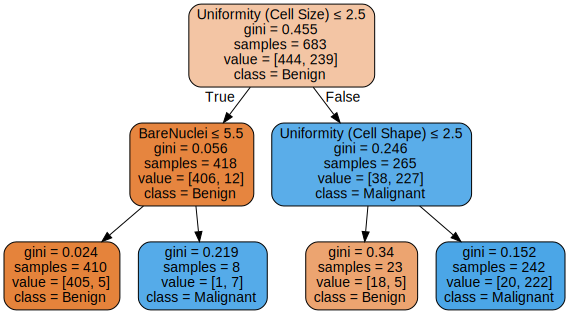

In [ ]:
# Constructing the binary decision tree for the breast cancer dataset
breastc_tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2)
breastc_tree = breastc_tree.fit(x,y)
breastc_ds_cols = ['Sample Code #', 'Clump Thickness', 'Uniformity (Cell Size)', 'Uniformity (Cell Shape)', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'BareNuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
graph_breastc_tree = tree.export_graphviz(breastc_tree, feature_names=breastc_ds_cols, class_names=['Benign','Malignant'], out_file=None,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(graph_breastc_tree)
graph

In [ ]:
# Computing entropy of the first split
from scipy.stats import entropy
prob = [(418/683), (265/683)]
entro = entropy(prob, base=2)
# Computing gini of the first split
gin = (0.056+0.246)/2
# Computing misclassification error of the first split
misclass_err = 1 - (418/683)
print('Entropy of first split:', entro)
print('Gini of first split:', gin)
print('Misclassification error of first split:', misclass_err)

Entropy of first split: 0.963492891548937
Gini of first split: 0.151
Misclassification error of first split: 0.3879941434846267


In [ ]:
# Calculating the information gain
benign_prob = [(410/418), (8/418)]
benign_entro = entropy(benign_prob, base=2)
malig_prob = [(23/265), (242/265)]
malig_entro = entropy(malig_prob, base=2)
gain = entro - ((418/683)*benign_entro + ((265/683)*malig_entro))
print("Information gain:", gain)

Information gain: 0.714748654935157


In [ ]:
# Problem 2 (End)

In [ ]:
# Problem 3 (Start)

In [ ]:
breastc_ds_cols = ['ID #', 'Diagnosis', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
breastc_ds = pd.read_csv('wdbc.data', delimiter=',', header=None, names=breastc_ds_cols)
breastc_ds.head()

,ID #,Diagnosis,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Standardizing the data w/in the breast cancer dataset
from sklearn.preprocessing import StandardScaler
input_features = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
x_features = breastc_ds.loc[:, input_features].values
y_feature = breastc_ds.loc[:,['Diagnosis']].values
x_features = StandardScaler().fit_transform(x_features)
breastc_standardize = pd.DataFrame(data=x_features, columns=input_features)
breastc_standardize.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Performing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x_features)
breastc_principal = pd.DataFrame(data=principal_components, columns=['PC1'])
breastc_principal = pd.concat([breastc_principal, breastc_ds[['ID #', 'Diagnosis']]], axis=1)
breastc_principal.head()

,PC1,ID #,Diagnosis
0,9.192837,842302,M
1,2.387802,842517,M
2,5.733896,84300903,M
3,7.122953,84348301,M
4,3.935302,84358402,M


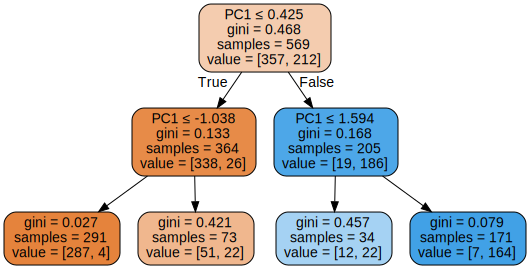

In [ ]:
# Constructing the binary decision tree for the PCA-based breast cancer dataset
PC1_data = breastc_principal.iloc[:, :-2].values
PCA_tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2)
PCA_tree = PCA_tree.fit(PC1_data, y_feature)
graph_PCA_tree = tree.export_graphviz(PCA_tree, feature_names=['PC1'], out_file=None,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(graph_PCA_tree)
graph

In [ ]:
# Classification report for the PCA-based breast cancer dataset
predict = PCA_tree.predict(PC1_data)
print(metrics.classification_report(y_feature, predict))

              precision    recall  f1-score   support

           B       0.93      0.95      0.94       357
           M       0.91      0.88      0.89       212

    accuracy                           0.92       569
   macro avg       0.92      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569



In [ ]:
# Repeating process but w/ 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_features)
breastc_principal = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
breastc_principal = pd.concat([breastc_principal, breastc_ds[['ID #', 'Diagnosis']]], axis=1)
breastc_principal.head()

,PC1,PC2,ID #,Diagnosis
0,9.192837,1.948583,842302,M
1,2.387802,-3.768172,842517,M
2,5.733896,-1.075174,84300903,M
3,7.122953,10.275589,84348301,M
4,3.935302,-1.948072,84358402,M


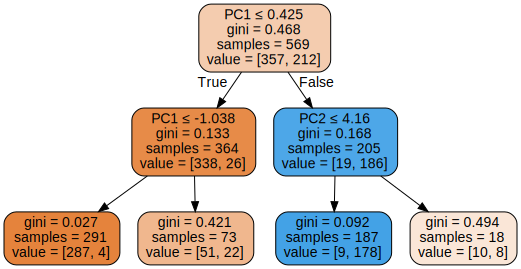

In [ ]:
PC12_data = breastc_principal.iloc[:, :-2].values
PCA_tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2)
PCA_tree = PCA_tree.fit(PC12_data, y_feature)
graph_PCA_tree = tree.export_graphviz(PCA_tree, feature_names=['PC1','PC2'], out_file=None,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(graph_PCA_tree)
graph

In [ ]:
predict = PCA_tree.predict(PC12_data)
print(metrics.classification_report(y_feature, predict))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94       357
           M       0.95      0.84      0.89       212

    accuracy                           0.92       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.92      0.92       569



In [ ]:
# Creating the confusion matrix for the PCA with 2 principal components: 
# TP  FP
# FN  TN
print(metrics.confusion_matrix(y_feature, predict))

[[348   9]
 [ 34 178]]


In [ ]:
# Problem 3 (End)

In [ ]:
# Problem 4 (Start)

In [ ]:
# Creating the first random distribution
array1 = np.random.normal(5,2,1000)
df1 = pd.DataFrame(data=array1, columns=["Data"])
arr1class = np.full((1000,), 1)
df1['Class'] = arr1class
# Creating the second random distribution
array2 = np.random.normal(-5,2,1000)
df2 = pd.DataFrame(data=array2, columns=["Data"])
arr2class = np.full((1000,), 2)
df2['Class'] = arr2class
# Combining the 2 random distributions
dfscombined = pd.concat([df1,df2])
dfscombined

,Data,Class
0,5.942040,1
1,4.658186,1
2,5.975455,1
3,4.311490,1
4,5.889153,1
...,...,...
995,-2.448281,2
996,-5.070002,2
997,-5.591828,2
998,-8.379757,2


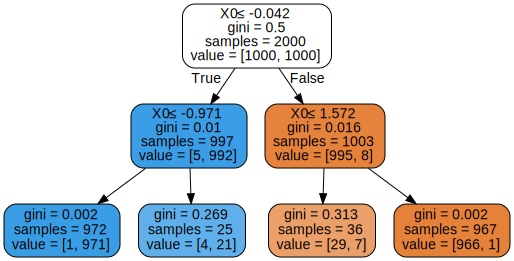

In [ ]:
# Creating the binary decision tree for the combined random distributions
randomdis_data = dfscombined.iloc[:, :-1].values
clas = dfscombined.loc[:,['Class']].values
randomdis_tree = DecisionTreeClassifier(max_depth=2)
randomdis_tree = randomdis_tree.fit(randomdis_data, clas)
graph_dis_tree = tree.export_graphviz(randomdis_tree, out_file=None,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(graph_dis_tree)
graph

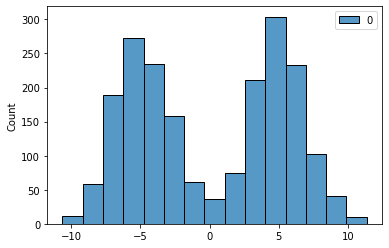

In [ ]:
# Empirical distribution of the data
sns.histplot(data=randomdis_data)

In [ ]:
# Problem 4 (End)